In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
file = open(r'E:\Users\OneDrive\桌面\data1.csv','rb')
data=pd.read_csv(file)
file.close()
data

,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度B，T）,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,25,50020,1997.955250,1,0.000213,0.000389,0.000566,0.000743,0.000919,0.001096,...,-0.001551,-0.001374,-0.001198,-0.001022,-0.000846,-0.000669,-0.000492,-0.000316,-0.000140,0.000036
1,25,50020,2427.749830,1,-0.000551,-0.000358,-0.000165,0.000028,0.000221,0.000413,...,-0.002476,-0.002284,-0.002091,-0.001899,-0.001707,-0.001515,-0.001322,-0.001129,-0.000937,-0.000744
2,25,50020,3332.725760,1,-0.003780,-0.003564,-0.003349,-0.003134,-0.002919,-0.002704,...,-0.005927,-0.005713,-0.005499,-0.005285,-0.005070,-0.004855,-0.004640,-0.004425,-0.004210,-0.003995
3,25,50020,4502.908007,1,-0.000511,-0.000267,-0.000023,0.000222,0.000466,0.000711,...,-0.002950,-0.002707,-0.002463,-0.002220,-0.001976,-0.001732,-0.001488,-0.001244,-0.001000,-0.000756
4,25,50020,6063.023248,1,0.000458,0.000732,0.001007,0.001281,0.001555,0.001830,...,-0.002290,-0.002016,-0.001741,-0.001466,-0.001192,-0.000917,-0.000642,-0.000367,-0.000092,0.000183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,90,446410,25951.976130,3,-0.014217,-0.013898,-0.013582,-0.013266,-0.012951,-0.012634,...,-0.016320,-0.016200,-0.016076,-0.015945,-0.015797,-0.015620,-0.015403,-0.015143,-0.014849,-0.014537
3396,90,446410,41673.753350,3,-0.017910,-0.017508,-0.017108,-0.016711,-0.016312,-0.015912,...,-0.020542,-0.020390,-0.020234,-0.020069,-0.019883,-0.019663,-0.019394,-0.019070,-0.018703,-0.018312
3397,90,446410,53402.776280,3,-0.020028,-0.019578,-0.019130,-0.018684,-0.018237,-0.017790,...,-0.023021,-0.022852,-0.022679,-0.022491,-0.022278,-0.022022,-0.021709,-0.021337,-0.020920,-0.020478
3398,90,446410,112528.009400,3,-0.027652,-0.027021,-0.026392,-0.025764,-0.025138,-0.024513,...,-0.032188,-0.031942,-0.031679,-0.031381,-0.031029,-0.030602,-0.030094,-0.029522,-0.028912,-0.028285


In [2]:
def data_deal(data):
    F1 = []
    F2 = []
    F3 = []
    F4 = []
    F5 = []
    F6 = []
    F7 = []
    F8 = []
    F9 = []
    F10 = []
    F11 = []
    F12 = []
    F13 = []
    F14 = []
    F15 = []
    F16 = []
    F17 = []
    F18 = []
    F19 = []
    for i in range(len(data)):
        a=data[i,4:]

        F1.append(max(a))
        F2.append(max(np.abs(a)))
        F3.append(min(a))
        F4.append(np.mean(a))
        F5.append(max(a)-min(a))
        F6.append(np.mean(np.abs(a)))
        F7.append(np.sqrt(np.mean(a**2)))
        f8=(np.mean(np.sqrt(np.abs(a))))**2
        F8.append(f8)
        f9=np.sqrt(np.sum((a-np.mean(a))**2)/(len(a)+1))
        F9.append(f9)
        F10.append(np.sum((a-np.mean(a))**4)/(len(a)-1)/f9**4)
        F11.append(np.sum(a-np.mean(a))**3/(len(a)-1)/f9**3)
        F12.append(max(np.abs(a))/f8)
        F13.append(np.sqrt(np.mean(a**2))/np.mean(np.abs(a)))
        F14.append(max(np.abs(a))/np.mean(np.abs(a)))
        F15.append(max(np.abs(a))/np.sqrt(np.mean(a**2)))
        
        fft_result = np.fft.fft(a)
        # 计算频率
        n = len(a)
        frequencies = np.fft.fftfreq(n)
        F16.append(max(np.abs(fft_result))/max(a)) # 频谱强度归一化。用来衡量信号中频率成分的相对强度
        F17.append(frequencies[-1]-frequencies[0]) # 频谱宽度
        F18.append(max(np.abs(fft_result))) # 频率峰值
        F19.append(np.sum(abs(fft_result)**2))   # 总能量
    F1 =np.array(F1).reshape(-1,1)
    F2 =np.array(F2).reshape(-1,1)
    F3 =np.array(F3).reshape(-1,1)
    F4 =np.array(F4).reshape(-1,1)
    F5 =np.array(F5).reshape(-1,1)
    F6 =np.array(F6).reshape(-1,1)
    F7 =np.array(F7).reshape(-1,1)
    F8 =np.array(F8).reshape(-1,1)
    F9 =np.array(F9).reshape(-1,1)
    F10 =np.array(F10).reshape(-1,1)
    F11 =np.array(F11).reshape(-1,1)
    F12 =np.array(F12).reshape(-1,1)
    F13 =np.array(F13).reshape(-1,1)
    F14 =np.array(F14).reshape(-1,1)
    F15 =np.array(F15).reshape(-1,1)
    F16 =np.array(F16).reshape(-1,1)
    F17 =np.array(F17).reshape(-1,1)
    F18 =np.array(F18).reshape(-1,1)
    F19 =np.array(F19).reshape(-1,1)
    result=np.hstack((F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19))
    return result,data[:,3]
data=np.array(data)
X, y = data_deal(data)
#file = open(r'E:\Users\OneDrive\桌面\result.csv','w')
#np.savetxt(file, result, delimiter=',')
#file.close()

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       243
         2.0       1.00      1.00      1.00       267
         3.0       1.00      1.00      1.00       170

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680

   Feature  Importance
16     F17    0.000000
3       F4    0.000000
10     F11    0.000000
18     F19    0.000251
2       F3    0.000283
6       F7    0.000298
0       F1    0.000373
4       F5    0.000384
1       F2    0.000471
8       F9    0.000765
5       F6    0.001106
7       F8    0.001512
17     F18    0.003114
15     F16    0.102715
13     F14    0.157720
11     F12    0.165241
12     F13    0.166234
14     F15    0.189737
9      F10    0.209798


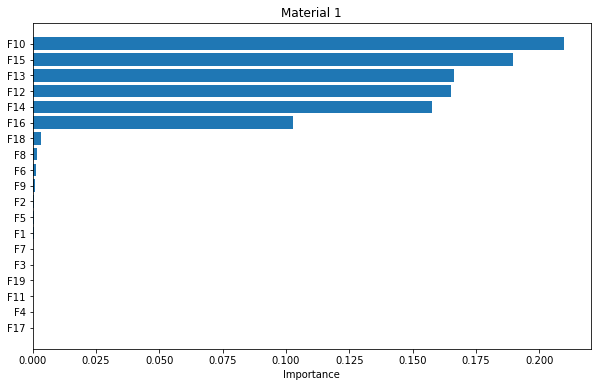

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

# 创建特征重要性数据框
importance_df = pd.DataFrame({
    'Feature': ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19'],
    'Importance': feature_importance
})
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))
# 按重要性排序
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# 输出特征重要性
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'],)
plt.xlabel('Importance')
plt.title('Material 1')
plt.show()

In [4]:
deal_data, y = data_deal(data)
deal_data = deal_data[:,(9,12,14)]
X_train, X_test, y_train, y_test = train_test_split(deal_data, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       243
         2.0       1.00      1.00      1.00       267
         3.0       1.00      1.00      1.00       170

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



In [5]:
file = open(r'E:\Users\OneDrive\桌面\test1.csv','rb')
test=pd.read_csv(file)
file.close()
test

,序号,温度，oC,频率，Hz,磁芯,0（磁通密度B，T）,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,1,25,56180,1,-0.101398,-0.099219,-0.097045,-0.094873,-0.092701,-0.090534,...,-0.106739,-0.106970,-0.107198,-0.107405,-0.107564,-0.107633,-0.107374,-0.106567,-0.105241,-0.103473
1,2,25,125890,1,-0.031775,-0.031081,-0.030391,-0.029704,-0.029019,-0.028333,...,-0.034050,-0.034100,-0.034136,-0.034158,-0.034159,-0.034103,-0.033926,-0.033588,-0.033087,-0.032461
2,3,25,224180,1,-0.066871,-0.065300,-0.063737,-0.062185,-0.060640,-0.059101,...,-0.074207,-0.074200,-0.074168,-0.074077,-0.073844,-0.073352,-0.072520,-0.071357,-0.069958,-0.068436
3,4,25,282480,1,-0.023190,-0.022634,-0.022084,-0.021540,-0.020998,-0.020455,...,-0.027047,-0.027007,-0.026898,-0.026682,-0.026344,-0.025900,-0.025387,-0.024845,-0.024297,-0.023745
4,5,50,199170,1,-0.077613,-0.075852,-0.074096,-0.072348,-0.070611,-0.068883,...,-0.084331,-0.084361,-0.084376,-0.084366,-0.084294,-0.084046,-0.083461,-0.082435,-0.081015,-0.079358
5,6,25,282480,1,-0.011507,-0.011253,-0.011001,-0.010750,-0.010497,-0.010244,...,-0.012991,-0.012892,-0.012794,-0.012694,-0.012592,-0.012481,-0.012349,-0.012187,-0.011987,-0.011756
6,7,50,56160,1,-0.035798,-0.035013,-0.034231,-0.033448,-0.032664,-0.031883,...,-0.040471,-0.040178,-0.039886,-0.039586,-0.039273,-0.038894,-0.038426,-0.037890,-0.037264,-0.036558
7,8,50,89210,1,-0.027493,-0.026872,-0.026253,-0.025635,-0.025018,-0.024401,...,-0.031639,-0.031403,-0.031158,-0.030887,-0.030565,-0.030183,-0.029744,-0.029251,-0.028706,-0.028113
8,9,70,158740,1,-0.033539,-0.032832,-0.032128,-0.031422,-0.030721,-0.030026,...,-0.037110,-0.036849,-0.036585,-0.036317,-0.036044,-0.035765,-0.035480,-0.035169,-0.034768,-0.034214
9,10,70,199180,1,-0.020561,-0.020113,-0.019667,-0.019221,-0.018774,-0.018332,...,-0.023029,-0.022861,-0.022691,-0.022520,-0.022347,-0.022170,-0.021976,-0.021732,-0.021408,-0.021005


In [6]:
test=np.array(test)
X, y = data_deal(test)
X = X[:,(9,12,14)]
y_pre=model.predict(X)
print(y_pre)
#file = open(r'E:\Users\OneDrive\桌面\yyy.csv','w')
#np.savetxt(file, yy.reshape(-1,1), delimiter=',')
#file.close()

[2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2.]
